In [1]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
dat=pd.read_excel(r'C:\Users\Nandakishore\Desktop\live project\supplychain dataset.xlsx')

In [3]:
dat.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
dat.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [5]:
dat.wh_est_year.mean()

2009.4012063765617

In [6]:
dat['workers_num'].median()

28.0

In [7]:
dat['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [8]:
dat['wh_est_year'] = dat['wh_est_year'].fillna(2009)

In [9]:
dat['workers_num'] = dat['workers_num'].fillna(28)

In [10]:
dat['approved_wh_govt_certificate'].fillna(dat['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [11]:
dat = dat.drop(['Ware_house_ID','WH_Manager_ID','flood_proof'],axis=1)

In [12]:
dat.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

# Feature Engineering:

BINNING OF NEW COLUMNs

In [13]:
#Creating bins and labels 1:Warehouse Breakdown
bins = [0,2,4,6]
labels = ['less','medium','more']
dat['breakdown range'] = pd.cut(dat['wh_breakdown_l3m'],bins = bins, labels = labels)

In [14]:
#Creating bins and labels 2:Transport issues
bins = [-1,1,3,5]
labels = ['low','medium','high']
dat['transport_issue_range'] = pd.cut(dat['transport_issue_l1y'],bins = bins, labels = labels)

In [15]:
#Creating bins and labels 3:Storage Issues Reported
bins = [-1,10,20,30,40]
labels = ['low','medium','high','very high']
dat['storage_issue_range'] = pd.cut(dat['storage_issue_reported_l3m'],bins = bins, labels = labels)

In [16]:
#Creating bins and labels 4:Refill Request Range
bins = [-1,2,5,8]
labels = ['less','medium','more']
dat['refill_req_range'] = pd.cut(dat['num_refill_req_l3m'],bins = bins, labels = labels)

In [17]:
#Creating bins and labels 5:Warehouse Est Year
bins = [1995,2004,2013,2023]
labels = ['old_age','middle_age','new_age']
dat['wh_est_year_range'] = pd.cut(dat['wh_est_year'],bins = bins, labels = labels)

In [18]:
data = dat.copy()# We now dropping the base columns of newly binned columns.Its did in the copy of our dataset.

In [19]:
data = data.drop(['wh_breakdown_l3m','transport_issue_l1y','storage_issue_reported_l3m','num_refill_req_l3m','wh_est_year'],axis=1)

In [20]:
data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,electric_supply,...,workers_num,temp_reg_mach,approved_wh_govt_certificate,govt_check_l3m,product_wg_ton,breakdown range,transport_issue_range,storage_issue_range,refill_req_range,wh_est_year_range
0,Urban,Small,West,Zone 6,2,4651,Rented,24,0,1,...,29.0,0,A,15,17115,more,low,medium,medium,middle_age
1,Rural,Large,North,Zone 5,4,6217,Company Owned,47,0,1,...,31.0,0,A,17,5074,medium,low,low,less,middle_age
2,Rural,Mid,South,Zone 2,4,4306,Company Owned,64,0,0,...,37.0,0,A,22,23137,more,low,medium,less,middle_age
3,Rural,Mid,North,Zone 3,2,6000,Rented,50,0,0,...,21.0,1,A+,27,22115,medium,high,medium,more,middle_age
4,Rural,Large,North,Zone 5,2,4740,Company Owned,42,1,1,...,25.0,0,C,24,24071,more,low,medium,medium,middle_age


ENCODING CATEGORICAL VALUES INTO NUMERICAL

In [21]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Location_type']= label_encoder.fit_transform(data['Location_type'])
data['WH_capacity_size']= label_encoder.fit_transform(data['WH_capacity_size'])
data['zone']= label_encoder.fit_transform(data['zone'])
data['WH_regional_zone']= label_encoder.fit_transform(data['WH_regional_zone'])
data['wh_owner_type']= label_encoder.fit_transform(data['wh_owner_type'])
data['approved_wh_govt_certificate']= label_encoder.fit_transform(data['approved_wh_govt_certificate'])

In [22]:
data['breakdown range']= label_encoder.fit_transform(data['breakdown range'])
data['transport_issue_range']= label_encoder.fit_transform(data['transport_issue_range'])
data['storage_issue_range']= label_encoder.fit_transform(data['storage_issue_range'])
data['refill_req_range']= label_encoder.fit_transform(data['refill_req_range'])
data['wh_est_year_range']= label_encoder.fit_transform(data['wh_est_year_range'])

In [23]:
data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,electric_supply,...,workers_num,temp_reg_mach,approved_wh_govt_certificate,govt_check_l3m,product_wg_ton,breakdown range,transport_issue_range,storage_issue_range,refill_req_range,wh_est_year_range
0,1,2,3,5,2,4651,1,24,0,1,...,29.0,0,0,15,17115,2,1,2,1,0
1,0,0,1,4,4,6217,0,47,0,1,...,31.0,0,0,17,5074,1,1,1,0,0
2,0,1,2,1,4,4306,0,64,0,0,...,37.0,0,0,22,23137,2,1,2,0,0
3,0,1,1,2,2,6000,1,50,0,0,...,21.0,1,1,27,22115,1,0,2,2,0
4,0,0,1,4,2,4740,0,42,1,1,...,25.0,0,4,24,24071,2,1,2,1,0


# Implimenting new columns:

Feature engineering 1 :Using logical operator OR.

Column name :Location having Temperature Regulatory Machines.

In [24]:
data['location_with_temp_reg_machines'] = data['Location_type'] | data['temp_reg_mach'] 

Feature Engineering 2

Here combining storage issues and warehouse breakdown and creating a new column shows standard of WH.


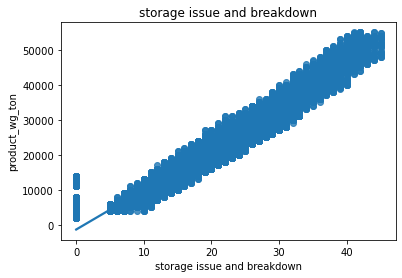

In [25]:
storage_issue_breakdown= (dat.storage_issue_reported_l3m)+(dat.wh_breakdown_l3m)
sns.regplot(x = storage_issue_breakdown,y = dat.product_wg_ton)
plt.xlabel('storage issue and breakdown')
plt.ylabel('product_wg_ton')
plt.title('storage issue and breakdown')
plt.show()

In [26]:
# Creating New Column in our Dataset as storage issue and breakdown
data['storage issue and breakdown'] = storage_issue_breakdown
data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,electric_supply,...,approved_wh_govt_certificate,govt_check_l3m,product_wg_ton,breakdown range,transport_issue_range,storage_issue_range,refill_req_range,wh_est_year_range,location_with_temp_reg_machines,storage issue and breakdown
0,1,2,3,5,2,4651,1,24,0,1,...,0,15,17115,2,1,2,1,0,1,18
1,0,0,1,4,4,6217,0,47,0,1,...,0,17,5074,1,1,1,0,0,0,7
2,0,1,2,1,4,4306,0,64,0,0,...,0,22,23137,2,1,2,0,0,0,23
3,0,1,1,2,2,6000,1,50,0,0,...,1,27,22115,1,0,2,2,0,1,20
4,0,0,1,4,2,4740,0,42,1,1,...,4,24,24071,2,1,2,1,0,0,24


In [27]:
#Rearraning columns:
desired_order=['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'electric_supply', 'dist_from_hub',
       'workers_num', 'temp_reg_mach', 'approved_wh_govt_certificate',
       'govt_check_l3m', 'breakdown range',
       'transport_issue_range', 'storage_issue_range', 'refill_req_range',
       'wh_est_year_range', 'location_with_temp_reg_machines',
       'storage issue and breakdown','product_wg_ton']
data=data.reindex(columns=desired_order)
data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,electric_supply,...,approved_wh_govt_certificate,govt_check_l3m,breakdown range,transport_issue_range,storage_issue_range,refill_req_range,wh_est_year_range,location_with_temp_reg_machines,storage issue and breakdown,product_wg_ton
0,1,2,3,5,2,4651,1,24,0,1,...,0,15,2,1,2,1,0,1,18,17115
1,0,0,1,4,4,6217,0,47,0,1,...,0,17,1,1,1,0,0,0,7,5074
2,0,1,2,1,4,4306,0,64,0,0,...,0,22,2,1,2,0,0,0,23,23137
3,0,1,1,2,2,6000,1,50,0,0,...,1,27,1,0,2,2,0,1,20,22115
4,0,0,1,4,2,4740,0,42,1,1,...,4,24,2,1,2,1,0,0,24,24071


So we performed BINNING with 5 columns wich are 'storage_issue_reported_l3m','wh_breakdown_l3m' ,'transport_issue_l1y',wh_est_year and num_refill_req_l3m.

Then we use OR operator to create column 'location_with_temp_reg_machines' and use '+' to create 'storage issue and breakdown'.

# Outlier Treatment using IQR method

<Figure size 1080x1440 with 0 Axes>

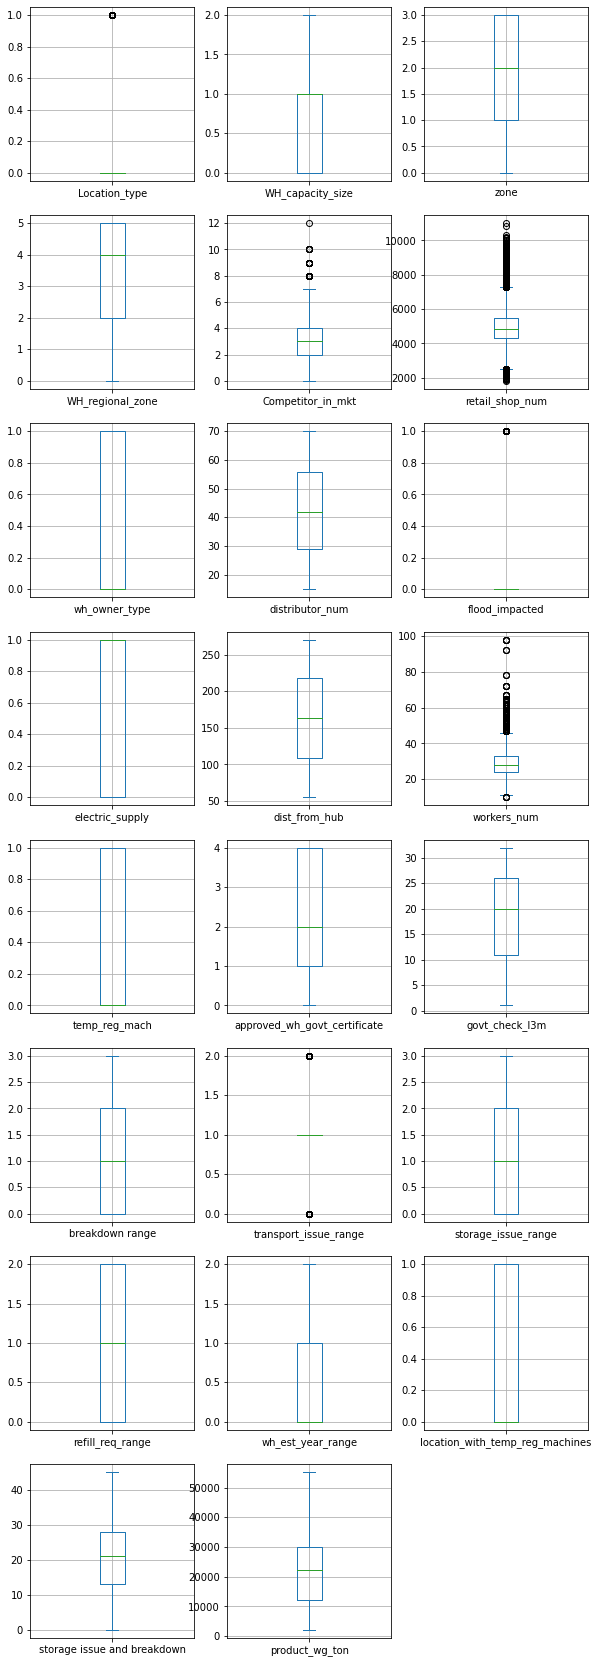

In [28]:
# Box Plot after Treating an Outliers
plt.figure(figsize=(15,20))
data.plot(kind='box', subplots=True, layout=(8,3), sharex=False,sharey=False,figsize=(10,30),grid =True)
plt.show()

In [29]:
# Identify and handle outliers
Q1 = data.quantile(0.25)
Q3 =  data.quantile(0.75)
IQR = Q3 - Q1
data1 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

<Figure size 1080x1440 with 0 Axes>

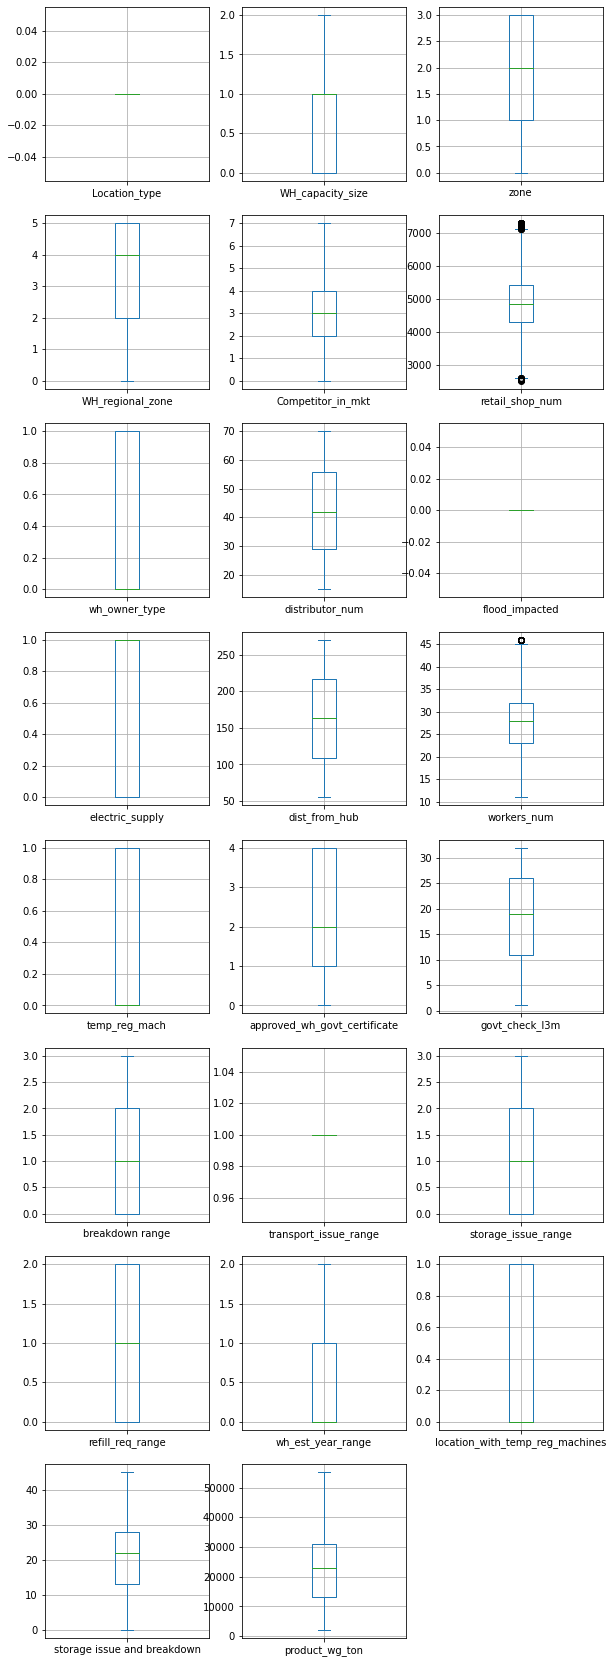

In [30]:
# Box Plot after Treating an Outliers
plt.figure(figsize=(15,20))
data1.plot(kind='box', subplots=True, layout=(8,3), sharex=False,sharey=False,figsize=(10,30),grid =True)
plt.show()

In [31]:
data.shape

(22150, 23)

In [32]:
data1.shape

(13644, 23)

# Checking VIF

VIF is a measure of multicollinearity between predictor variables in a regression model, and it assesses the correlation between each predictor variable and the other predictor variables. It helps identify variables that are highly correlated and may affect the model's performance.

In [33]:
X = data1.drop('product_wg_ton',axis = 1).values
y = data1['product_wg_ton'].values

In [34]:
#checking multicollinearity.
#This will display the VIF values for each independent variable. Variables with high VIF values may indicate multicollinearity issues.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data1.drop('product_wg_ton',axis = 1)  # Add all your independent variables
X = sm.add_constant(X)
model = sm.OLS(data1['product_wg_ton'], X)
results = model.fit()
vif = pd.DataFrame()
vif["FEATURES COLUMN"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                    FEATURES COLUMN  VIF Factor
0                     Location_type         NaN
1                  WH_capacity_size    1.394770
2                              zone    1.070678
3                  WH_regional_zone    1.384286
4                 Competitor_in_mkt    1.054277
5                   retail_shop_num    1.037282
6                     wh_owner_type    1.074992
7                   distributor_num    1.000769
8                    flood_impacted         NaN
9                   electric_supply    1.199362
10                    dist_from_hub    1.000945
11                      workers_num    1.187358
12                    temp_reg_mach         inf
13     approved_wh_govt_certificate    1.078952
14                   govt_check_l3m    1.126441
15                  breakdown range    1.029232
16            transport_issue_range  115.862843
17              storage_issue_range    1.019394
18                 refill_req_range    1.300627
19                wh_est_year_range    1

If you encounter infinite values (inf) when calculating the Variance Inflation Factor (VIF), it indicates a perfect multicollinearity issue within your dataset. Perfect multicollinearity occurs when one or more predictor variables in a regression model can be perfectly predicted using a combination of other predictor variables.

        When perfect multicollinearity exists, VIF cannot be computed because it involves dividing by zero, resulting in an infinite value (inf).
        
        If two or more variables are highly correlated, you can choose to keep only one of them and remove the others. Instead of removing variables, you can create new variables by combining the correlated ones. For example, you can calculate the average or sum of two correlated variables and use that as a single variable in your model.
        
        Remember that multicollinearity can negatively impact the interpretation and performance of your regression model.
        
        Division by zero: VIF involves dividing the variance of one predictor variable by the variance inflation factor. If the variance of a predictor variable is zero, division by zero occurs, resulting in NaN values.

        Constant or near-constant variables: When a predictor variable has no variance or extremely low variance, it can lead to NaN values in VIF calculations. This often happens with constant variables or those with very few distinct values.

In [35]:
#Since multicollinearity issues here we can drop location_with_temp_reg_machines and transport_issue_range

# Mutual Information Gain

        Mutual information(MI)between two random variables is a non-negative value,which measures the dependency between the variables .It is equal to zero if and only if two random variables are independent ,and higher values mean higher dependency

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data1.drop(labels=['product_wg_ton'], axis=1),
data1['product_wg_ton'],test_size=0.3,random_state=0)

In [37]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([2.26081549e-03, 1.34342305e-04, 1.10454527e-02, 4.96496912e-03,
       0.00000000e+00, 5.95653421e-03, 0.00000000e+00, 1.01261952e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.02561784e-02, 9.15822351e-02, 6.21718673e-03, 1.40071707e-01,
       4.40553057e-03, 1.14762624e+00, 4.80033797e-03, 2.81364884e-01,
       1.09357012e-02, 1.59386820e+00])

In [38]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

storage issue and breakdown        1.593868
storage_issue_range                1.147626
wh_est_year_range                  0.281365
breakdown range                    0.140072
approved_wh_govt_certificate       0.091582
zone                               0.011045
location_with_temp_reg_machines    0.010936
temp_reg_mach                      0.010256
distributor_num                    0.010126
govt_check_l3m                     0.006217
retail_shop_num                    0.005957
WH_regional_zone                   0.004965
refill_req_range                   0.004800
transport_issue_range              0.004406
Location_type                      0.002261
WH_capacity_size                   0.000134
dist_from_hub                      0.000000
electric_supply                    0.000000
flood_impacted                     0.000000
wh_owner_type                      0.000000
Competitor_in_mkt                  0.000000
workers_num                        0.000000
dtype: float64

<AxesSubplot:>

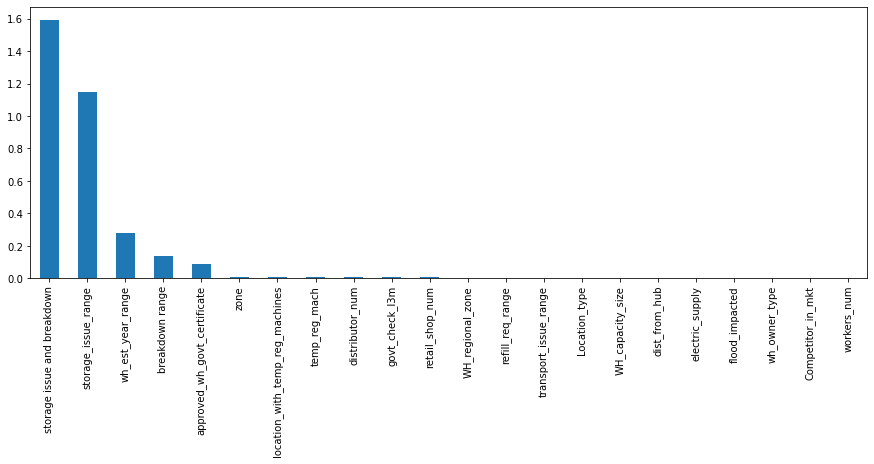

In [39]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [40]:
#Here we are accepting first 7 columns as per this MIG plot and as per grapical and ypothetical way.

# Model Building

In [41]:
#Creating new dataset data2 as a copy of data1 and then dropping less significant columns.
data2=data1.drop(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'electric_supply', 'dist_from_hub',
       'workers_num','govt_check_l3m', 'transport_issue_range','refill_req_range'],axis=1)
data2.head()

,temp_reg_mach,approved_wh_govt_certificate,breakdown range,storage_issue_range,wh_est_year_range,location_with_temp_reg_machines,storage issue and breakdown,product_wg_ton
1,0,0,1,1,0,0,7,5074
2,0,0,2,2,0,0,23,23137
5,1,1,1,0,0,1,26,32134
6,0,2,1,0,0,0,27,30142
7,0,4,2,2,0,0,24,24093


In [42]:
data2.shape

(13644, 8)

In [43]:
#Applying minmax scalar to data2 
X = data2.drop('product_wg_ton',axis = 1).values
y = data2['product_wg_ton'].values

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [45]:
!pip install XGBoost

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [47]:
#importing neccessary libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Implimenting Different Algorithms

In [48]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_train_acc = linear_reg.score(X_train, y_train)
linear_test_acc = linear_reg.score(X_test, y_test)

In [49]:
# Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_train_acc = lasso_reg.score(X_train, y_train)
lasso_test_acc = lasso_reg.score(X_test, y_test)

In [50]:
# Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_train_acc = ridge_reg.score(X_train, y_train)
ridge_test_acc = ridge_reg.score(X_test, y_test)

In [51]:
# Decision Tree
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_train_acc = tree_reg.score(X_train, y_train)
tree_test_acc = tree_reg.score(X_test, y_test)

In [52]:
# Random Forest
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_train_acc = forest_reg.score(X_train, y_train)
forest_test_acc = forest_reg.score(X_test, y_test)

In [53]:
# XGBoost
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_train_acc = xgb_reg.score(X_train, y_train)
xgb_test_acc = xgb_reg.score(X_test, y_test)

# Finding train test acccuracy

In [54]:
# Print the train and test accuracies
print("Linear Regression Train Accuracy:", linear_train_acc)
print("Linear Regression Test Accuracy:", linear_test_acc)
print("Lasso Train Accuracy:", lasso_train_acc)
print("Lasso Test Accuracy:", lasso_test_acc)
print("Ridge Train Accuracy:", ridge_train_acc)
print("Ridge Test Accuracy:", ridge_test_acc)
print("Decision Tree Train Accuracy:", tree_train_acc)
print("Decision Tree Test Accuracy:", tree_test_acc)
print("Random Forest Train Accuracy:", forest_train_acc)
print("Random Forest Test Accuracy:", forest_test_acc)
print("XGBoost Train Accuracy:", xgb_train_acc)
print("XGBoost Test Accuracy:", xgb_test_acc)

Linear Regression Train Accuracy: 0.9446044774081352
Linear Regression Test Accuracy: 0.9470057880311626
Lasso Train Accuracy: 0.9446078446469865
Lasso Test Accuracy: 0.9469714039985513
Ridge Train Accuracy: 0.9446042252855383
Ridge Test Accuracy: 0.9469252974717488
Decision Tree Train Accuracy: 0.9928973669360671
Decision Tree Test Accuracy: 0.9894427189196362
Random Forest Train Accuracy: 0.9927871996615208
Random Forest Test Accuracy: 0.9901674853952458
XGBoost Train Accuracy: 0.99237213620006
XGBoost Test Accuracy: 0.990822163633965


# Cross validation

It splits the data into 5 folds here and evaluates the model's performance on each fold. 

It returns an array of scores, where each score represents the performance of the model on a particular fold.

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
# Linear Regression
linear_reg = LinearRegression()
linear_scores = cross_val_score(linear_reg, X, y, cv=5)

# Lasso
lasso_reg = Lasso()
lasso_scores = cross_val_score(lasso_reg, X, y, cv=5)

# Ridge
ridge_reg = Ridge()
ridge_scores = cross_val_score(ridge_reg, X, y, cv=5)

# Decision Tree
tree_reg = DecisionTreeRegressor()
tree_scores = cross_val_score(tree_reg, X, y, cv=5)

# Random Forest
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, X, y, cv=5)

# XGBoost
xgb_reg = XGBRegressor()
xgb_scores = cross_val_score(xgb_reg, X, y, cv=5)

# Print the cross-validation scores
print("Linear Regression Cross-Validation Scores:", linear_scores)
print("Lasso Cross-Validation Scores:", lasso_scores)
print("Ridge Cross-Validation Scores:", ridge_scores)
print("Decision Tree Cross-Validation Scores:", tree_scores)
print("Random Forest Cross-Validation Scores:", forest_scores)
print("XGBoost Cross-Validation Scores:", xgb_scores)

# Calculate and print the mean of cross-validation scores
#The mean of the cross-validation scores provides an overall measure of the model's performance across all the folds. 
#It gives you an estimate of how well the model is expected to perform on unseen data.
print("Linear Regression Mean CV Score:", linear_scores.mean())
print("Lasso Mean CV Score:", lasso_scores.mean())
print("Ridge Mean CV Score:", ridge_scores.mean())
print("Decision Tree Mean CV Score:", tree_scores.mean())
print("Random Forest Mean CV Score:", forest_scores.mean())
print("XGBoost Mean CV Score:", xgb_scores.mean())

Linear Regression Cross-Validation Scores: [0.94418143 0.94566312 0.94210752 0.94852113 0.94589325]
Lasso Cross-Validation Scores: [0.94417723 0.94565408 0.9421255  0.94851113 0.94587924]
Ridge Cross-Validation Scores: [0.94419558 0.94562971 0.94216265 0.94848745 0.9458591 ]
Decision Tree Cross-Validation Scores: [0.989586   0.98934786 0.98902546 0.98964174 0.99009056]
Random Forest Cross-Validation Scores: [0.99023844 0.98988729 0.98959848 0.99004268 0.99069103]
XGBoost Cross-Validation Scores: [0.99093857 0.99070585 0.99024212 0.99074364 0.99146471]
Linear Regression Mean CV Score: 0.9452732879417265
Lasso Mean CV Score: 0.9452694360420093
Ridge Mean CV Score: 0.9452668969264805
Decision Tree Mean CV Score: 0.9895383253241563
Random Forest Mean CV Score: 0.9900915865527631
XGBoost Mean CV Score: 0.9908189778043196


The mean score helps in comparing the performance of different models.

It allows you to assess which model or configuration is likely to perform better on unseen data.

Generally, a higher mean score indicates better model performance, but it should be considered alongside other evaluation metrics depending on the specific problem and requirements.

# Hyper parameter tuning of lasso, ridge, Desion Tree, Random Forest and xgb

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Perform Grid Search for Lasso Regression

# Define the parameter grid for each model
lasso_regression_params = {'alpha': [0.1, 0.5, 1.0]}  # Example values for alpha
ridge_regression_params = {'alpha': [0.1, 0.5, 1.0]}  # Example values for alpha

# Perform Grid Search for Lasso Regression
lasso_regression_grid = GridSearchCV(lasso_reg, param_grid=lasso_regression_params, scoring='neg_mean_squared_error')
lasso_regression_grid.fit(X, y)

# Perform Grid Search for Ridge Regression
ridge_regression_grid = GridSearchCV(ridge_reg, param_grid=ridge_regression_params, scoring='neg_mean_squared_error')
ridge_regression_grid.fit(X, y)

# Decision Tree Regression with Grid Search
tree_reg = DecisionTreeRegressor()
tree_params = {'max_depth': [None, 5, 10],
               'min_samples_split': [2, 5, 10]}# Example hyperparameters to tune  
tree_grid_search = GridSearchCV(tree_reg, tree_params, cv=5)
tree_grid_search.fit(X_train, y_train)
tree_best_params = tree_grid_search.best_params_
tree_best_model = tree_grid_search.best_estimator_
tree_train_acc = tree_best_model.score(X_train, y_train)
tree_test_acc = tree_best_model.score(X_test, y_test)

# Random Forest Regression with Grid Search
forest_reg = RandomForestRegressor()
forest_params = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10]}  # Example hyperparameters to tune
forest_grid_search = GridSearchCV(forest_reg, forest_params, cv=5)
forest_grid_search.fit(X_train, y_train)
forest_best_params = forest_grid_search.best_params_
forest_best_model = forest_grid_search.best_estimator_
forest_train_acc = forest_best_model.score(X_train, y_train)
forest_test_acc = forest_best_model.score(X_test, y_test)

# XGBoost Regression with Grid Search
xgb_reg = XGBRegressor()
xgb_params = {'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7]}  # Example hyperparameters to tune
xgb_grid_search = GridSearchCV(xgb_reg, xgb_params, cv=5)
xgb_grid_search.fit(X_train, y_train)
xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_
xgb_train_acc = xgb_best_model.score(X_train, y_train)
xgb_test_acc = xgb_best_model.score(X_test, y_test)

# Print the best parameters and train/test accuracies
print("Lasso Best Parameters:", lasso_regression_grid.best_params_)
print("Lasso Best Score:", -lasso_regression_grid.best_score_)
print("Ridge Best Parameters:", ridge_regression_grid.best_params_)
print("Ridge Best Score:", -ridge_regression_grid.best_score_)
print("Decision Tree Best Parameters:", tree_best_params)
print("Decision Tree Train Accuracy:", tree_train_acc)
print("Decision Tree Test Accuracy:", tree_test_acc)
print("Random Forest Best Parameters:", forest_best_params)
print("Random Forest Train Accuracy:", forest_train_acc)
print("Random Forest Test Accuracy:", forest_test_acc)
print("XGBoost Best Parameters:", xgb_best_params)
print("XGBoost Train Accuracy:", xgb_train_acc)
print("XGBoost Test Accuracy:", xgb_test_acc)

Lasso Best Parameters: {'alpha': 0.5}
Lasso Best Score: 7877813.804319987
Ridge Best Parameters: {'alpha': 0.1}
Ridge Best Score: 7877817.244657735
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree Train Accuracy: 0.9915911810502854
Decision Tree Test Accuracy: 0.989785426332505
Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Random Forest Train Accuracy: 0.9922678068804851
Random Forest Test Accuracy: 0.990600822877733
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 5}
XGBoost Train Accuracy: 0.9915819682139708
XGBoost Test Accuracy: 0.9910658839570825


In [59]:
#For Decision Tree,Random Forest and XGBoost we got test accuracy of 98%, 99% and 99% resp.

To calculate the train accuracy,Test Accuracy we used the score method of each model and pass the training features (X_train) and labels (y_train) as arguments. 

The score method calculates the R-squared value, which represents the proportion of the variance in the dependent variable that can be predicted from the independent variables. 

Higher values indicate better model performance.

Lasso Regression includes the hyperparameter alpha (α), which controls the strength of the L1 regularization term. Ridge Regression includes the hyperparameter alpha (α) as well, which controls the strength of the L2 regularization term. By defining a range of values for alpha and using grid search, you can systematically search for the best combination of hyperparameters that results in the optimal model performance.

# Checking Evaluation Matrics:

Here we are using Evaluation Matrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (coefficient of determination).

.Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values. A lower MSE is generally desirable, suggesting that the model's predictions are closer to the actual values.

.Root Mean Squared Error (RMSE): Square root of the MSE, provides a measure of the average magnitude of the errors. It is in the same units as the target variable.

.Mean Absolute Error (MAE): Measures the average absolute difference between the predicted and actual values. It represents the average magnitude of the errors, regardless of their direction.Similar to MSE, A lower MAE suggests that the model's predictions have less deviation from the actual values.

.R-squared (R2): Also known as the coefficient of determination, it indicates the proportion of the variance in the target variable that can be explained by the regression model. It ranges from 0 to 1, and higher values indicate better fit.

By calculating and examining these evaluation metrics for both the training and test sets, you can assess the performance of the regression model and understand how well it generalizes to unseen data.

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score#RMSE will derived from MSE.

LINEAR REGRESSOR

In [61]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [62]:
# Make predictions on the training and test data
y_train_pred = linear_reg.predict(X_train)
y_test_pred_linear = linear_reg.predict(X_test)

# Calculate evaluation metrics for training data
linear_mse_train = mean_squared_error(y_train, y_train_pred)
linear_rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
linear_mae_train = mean_absolute_error(y_train, y_train_pred)
linear_r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data
linear_mse_test = mean_squared_error(y_test, y_test_pred_linear)
linear_rmse_test = mean_squared_error(y_test, y_test_pred_linear, squared=False)
linear_mae_test = mean_absolute_error(y_test, y_test_pred_linear)
linear_r2_test = r2_score(y_test, y_test_pred_linear)

# Print the evaluation metrics
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", linear_mse_train)
print("Root Mean Squared Error (RMSE):", linear_rmse_train)
print("Mean Absolute Error (MAE):", linear_mae_train)
print("R-squared (R2):", linear_r2_train)
print()
print("Test Set Metrics:")
print("Mean Squared Error (MSE):", linear_mse_test)
print("Root Mean Squared Error (RMSE):", linear_rmse_test)
print("Mean Absolute Error (MAE):", linear_mae_test)
print("R-squared (R2):", linear_r2_test)

Training Set Metrics:
Mean Squared Error (MSE): 8080047.6534767635
Root Mean Squared Error (RMSE): 2842.542462915332
Mean Absolute Error (MAE): 2124.02249740645
R-squared (R2): 0.9446044774081352

Test Set Metrics:
Mean Squared Error (MSE): 7388097.757199545
Root Mean Squared Error (RMSE): 2718.1055456327567
Mean Absolute Error (MAE): 2053.8457506672817
R-squared (R2): 0.9470057880311626


Conclusion  
            
            In this linear model we can infere that training and test values of MSE,RMSE,MAE are in acceptale range and not so much differed.Also training & test R2 is 94%.So its a generic model.Below regression graph gives a linear relationship.

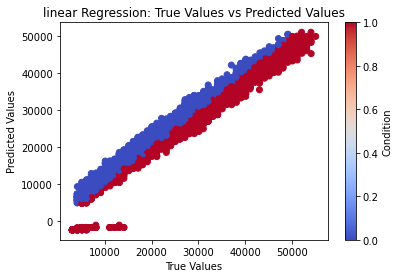

In [63]:
#Regression scatter plot bet predicted and actual values
# Define a condition to apply colors
condition = y_test > y_test_pred_linear
# Plot the predicted values against the true values
plt.scatter(y_test, y_test_pred_linear, c=condition, cmap='coolwarm')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('linear Regression: True Values vs Predicted Values')
plt.colorbar(label='Condition')

We can observe the general trend of the scatter plot. If the points form a linear pattern along a diagonal line from the bottom-left to the top-right, it indicates a strong positive correlation between the true and predicted values. This suggests that the model is capturing the underlying patterns well.

Scatter around the Trend Line: The dispersion of points around the diagonal trend line provides information about the model's accuracy. If the points are tightly clustered around the line, it indicates a higher accuracy and a good fit of the model. On the other hand, if the points are more spread out, it suggests that the model has a higher degree of variability in its predictions.

Outliers: Look for any points that deviate significantly from the trend line or appear as outliers. These points represent instances where the model's predictions differ considerably from the true values. Outliers might indicate specific patterns or data points that the model struggles to capture accurately.

Systematic Deviation: Check for any systematic deviation from the trend line. If the points consistently fall above or below the line, it suggests a bias in the model's predictions. This bias could indicate a specific pattern or relationship that the model fails to capture adequately.

LASSO REGRESSOR

In [64]:
# Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [65]:
# Make predictions on the training and test data
y_train_pred = lasso_reg.predict(X_train)
y_test_pred_las = lasso_reg.predict(X_test)

# Calculate evaluation metrics for Lasso Regression on the training set
lasso_mse_train = mean_squared_error(y_train, y_train_pred)
lasso_rmse_train = np.sqrt(lasso_mse_train)
lasso_r2_train = r2_score(y_train, y_train_pred)
lasso_mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate evaluation metrics for Lasso Regression on the test set
lasso_mse_test = mean_squared_error(y_test, y_test_pred_las)
lasso_rmse_test = np.sqrt(lasso_mse_test)
lasso_r2_test = r2_score(y_test, y_test_pred_las)
lasso_mae_test = mean_absolute_error(y_test, y_test_pred_las)

print("Lasso Regression Train Performance:")
print("Train Mean Squared Error (MSE):", lasso_mse_train)
print("Train Root Mean Squared Error (RMSE):", lasso_rmse_train)
print("Train Mean Absolute Error (MAE):", lasso_mae_train)
print("Train R-squared:", lasso_r2_train)

print("Lasso Regression Test Performance:")
print("Test Mean Squared Error (MSE):", lasso_mse_test)
print("Test Root Mean Squared Error (RMSE):", lasso_rmse_test)
print("Test Mean Absolute Error (MAE):", lasso_mae_test)
print("Test R-squared:", lasso_r2_test)

Lasso Regression Train Performance:
Train Mean Squared Error (MSE): 8079556.504569667
Train Root Mean Squared Error (RMSE): 2842.4560690659173
Train Mean Absolute Error (MAE): 2125.7167345754456
Train R-squared: 0.9446078446469865
Lasso Regression Test Performance:
Test Mean Squared Error (MSE): 7392891.348514173
Test Root Mean Squared Error (RMSE): 2718.987191678948
Test Mean Absolute Error (MAE): 2055.9797828089604
Test R-squared: 0.9469714039985513


Conclusion

        In this lasso model,we can infere that training and test values of MSE,RMSE,MAE are in acceptale range.Also train and test R2 value is 94% . Its also a generic model.

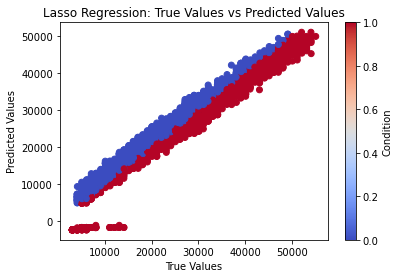

In [66]:
# Define a condition to apply colors
condition = y_test > y_test_pred_las
# Plot the predicted values against the true values
plt.scatter(y_test, y_test_pred_las, c=condition, cmap='coolwarm')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: True Values vs Predicted Values')
plt.colorbar(label='Condition')

RIDGE REGRESSOR

In [67]:
# Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [68]:
# Make predictions on the training and test data
y_train_pred = ridge_reg.predict(X_train)
y_test_pred_rid = ridge_reg.predict(X_test)

# Calculate evaluation metrics for ridge Regression on the training set
ridge_mse_train = mean_squared_error(y_train, y_train_pred)
ridge_rmse_train = np.sqrt(ridge_mse_train)
ridge_r2_train = r2_score(y_train, y_train_pred)
ridge_mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate evaluation metrics for ridge Regression on the test set
ridge_mse_test = mean_squared_error(y_test, y_test_pred_rid)
ridge_rmse_test = np.sqrt(ridge_mse_test)
ridge_r2_test = r2_score(y_test, y_test_pred_rid)
ridge_mae_test = mean_absolute_error(y_test, y_test_pred_rid)

print("ridge Regression Train Performance:")
print("Train Mean Squared Error (MSE):", ridge_mse_train)
print("Train Root Mean Squared Error (RMSE):", ridge_rmse_train)
print("Train Mean Absolute Error (MAE):", ridge_mae_train)
print("Train R-squared:", ridge_r2_train)

print("ridge Regression Test Performance:")
print("Test Mean Squared Error (MSE):", ridge_mse_test)
print("Test Root Mean Squared Error (RMSE):", ridge_rmse_test)
print("Test Mean Absolute Error (MAE):", ridge_mae_test)
print("Test R-squared:", ridge_r2_test)

ridge Regression Train Performance:
Train Mean Squared Error (MSE): 8080084.428336941
Train Root Mean Squared Error (RMSE): 2842.548931564229
Train Mean Absolute Error (MAE): 2129.2971004556534
Train R-squared: 0.9446042252855383
ridge Regression Test Performance:
Test Mean Squared Error (MSE): 7399319.211380819
Test Root Mean Squared Error (RMSE): 2720.168967432137
Test Mean Absolute Error (MAE): 2059.882816891511
Test R-squared: 0.9469252974717488


Conclusion
        
        Here we can infere that training and test values of MSE,RMSE,MAE are in normal range. R2 values are 94% .It can e a generic Model

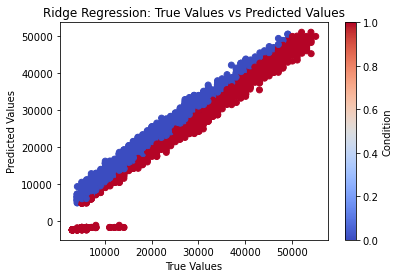

In [69]:
# Define a condition to apply colors
condition = y_test > y_test_pred_rid
# Plot the predicted values against the true values
plt.scatter(y_test, y_test_pred_rid, c=condition, cmap='coolwarm')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: True Values vs Predicted Values')
plt.colorbar(label='Condition')

DECISION TREE RERESSOR

In [70]:
# Decision Tree
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [71]:
# Make predictions on the training and test data
y_train_pred = tree_reg.predict(X_train)
y_test_pred_dt = tree_reg.predict(X_test)

# Calculate evaluation metrics for training data
tree_mse_train = mean_squared_error(y_train, y_train_pred)
tree_rmse_train = np.sqrt(tree_mse_train)
tree_mae_train = mean_absolute_error(y_train, y_train_pred)
tree_r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data
tree_mse_test = mean_squared_error(y_test, y_test_pred_dt)
tree_rmse_test = np.sqrt(tree_mse_test)
tree_mae_test = mean_absolute_error(y_test, y_test_pred_dt)
tree_r2_test = r2_score(y_test, y_test_pred_dt)

# Print the evaluation metrics
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", tree_mse_train)
print("Root Mean Squared Error (RMSE):", tree_rmse_train)
print("Mean Absolute Error (MAE):", tree_mae_train)
print("R-squared (R2):", tree_r2_train)
print()
print("Test Set Metrics:")
print("Mean Squared Error (MSE):", tree_mse_test)
print("Root Mean Squared Error (RMSE):",tree_rmse_test)
print("Mean Absolute Error (MAE):", tree_mae_test)
print("R-squared (R2):", tree_r2_test)

Training Set Metrics:
Mean Squared Error (MSE): 1035997.3322133684
Root Mean Squared Error (RMSE): 1017.8395414864606
Mean Absolute Error (MAE): 750.9792312750235
R-squared (R2): 0.9928973669360671

Test Set Metrics:
Mean Squared Error (MSE): 1471518.2147302483
Root Mean Squared Error (RMSE): 1213.061504924729
Mean Absolute Error (MAE): 920.7593051819644
R-squared (R2): 0.989444921988014


Conclusion

        Here we can infere that training and test values of MSE,RMSE,MAE have comparable difference.The R2 values of training & testing gives 99 % & 98% .It can be a generic one.

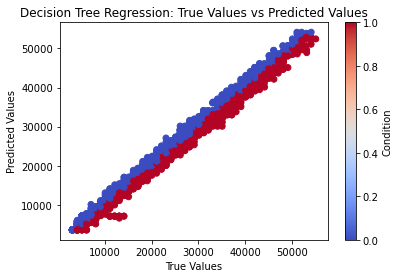

In [72]:
# Define a condition to apply colors
condition = y_test > y_test_pred_dt
# Plot the predicted values against the true values
plt.scatter(y_test, y_test_pred_dt, c=condition, cmap='coolwarm')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: True Values vs Predicted Values')
plt.colorbar(label='Condition')

RANDOM FOREST REGRESSOR

In [73]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = forest_reg.predict(X_train)
y_test_pred_rf = forest_reg.predict(X_test)

# Calculate evaluation metrics for training data
forest_mse_train = mean_squared_error(y_train, y_train_pred)
forest_rmse_train = np.sqrt(forest_mse_train)
forest_mae_train = mean_absolute_error(y_train, y_train_pred)
forest_r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data
forest_mse_test = mean_squared_error(y_test, y_test_pred_rf)
forest_rmse_test = np.sqrt(forest_mse_test)
forest_mae_test = mean_absolute_error(y_test, y_test_pred_rf)
forest_r2_test = r2_score(y_test, y_test_pred_rf)

# Print the evaluation metrics
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", forest_mse_train)
print("Root Mean Squared Error (RMSE):", forest_rmse_train)
print("Mean Absolute Error (MAE):", forest_mae_train)
print("R-squared (R2):", forest_r2_train)
print()
print("Test Set Metrics:")
print("Mean Squared Error (MSE):", forest_mse_test)
print("Root Mean Squared Error (RMSE):", forest_rmse_test)
print("Mean Absolute Error (MAE):", forest_mae_test)
print("R-squared (R2):", forest_r2_test)

Training Set Metrics:
Mean Squared Error (MSE): 1052096.8288451326
Root Mean Squared Error (RMSE): 1025.7177140154754
Mean Absolute Error (MAE): 774.6584749719755
R-squared (R2): 0.9927869913457699

Test Set Metrics:
Mean Squared Error (MSE): 1373021.9393346868
Root Mean Squared Error (RMSE): 1171.7601884919486
Mean Absolute Error (MAE): 902.1356187641735
R-squared (R2): 0.9901514275958163


Conclusion

        Here we can infere that training and test values of MSE,RMSE,MAE are in normal range. Both values gives a R2 value of99%.We can accept this model.

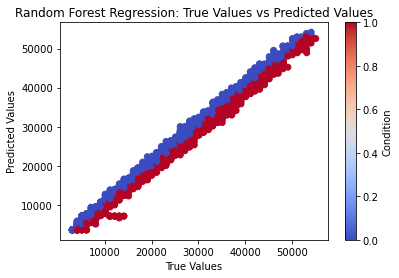

In [75]:
# Define a condition to apply colors
condition = y_test > y_test_pred_rf
# Plot the predicted values against the true values
plt.scatter(y_test, y_test_pred_rf, c=condition, cmap='coolwarm')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: True Values vs Predicted Values')
plt.colorbar(label='Condition')

XGBOOST REGRESSOR

In [76]:
# Create and train the XGBoost regressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

# Calculate evaluation metrics for training data
xgb_mse_train = mean_squared_error(y_train, y_train_pred)
xgb_rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
xgb_mae_train = mean_absolute_error(y_train, y_train_pred)
xgb_r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data
xgb_mse_test = mean_squared_error(y_test, y_test_pred_xgb)
xgb_rmse_test = mean_squared_error(y_test, y_test_pred_xgb, squared=False)
xgb_mae_test = mean_absolute_error(y_test, y_test_pred_xgb)
xgb_r2_test = r2_score(y_test, y_test_pred_xgb)

# Print the evaluation metrics
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", xgb_mse_train)
print("Root Mean Squared Error (RMSE):", xgb_rmse_train)
print("Mean Absolute Error (MAE):", xgb_mae_train)
print("R-squared (R2):", xgb_r2_train)
print()
print("Test Set Metrics:")
print("Mean Squared Error (MSE):", xgb_mse_test)
print("Root Mean Squared Error (RMSE):", xgb_rmse_test)
print("Mean Absolute Error (MAE):", xgb_mae_test)
print("R-squared (R2):", xgb_r2_test)

Training Set Metrics:
Mean Squared Error (MSE): 1112608.025234097
Root Mean Squared Error (RMSE): 1054.8023631155254
Mean Absolute Error (MAE): 806.2319216040166
R-squared (R2): 0.99237213620006

Test Set Metrics:
Mean Squared Error (MSE): 1279512.417539489
Root Mean Squared Error (RMSE): 1131.155346333778
Mean Absolute Error (MAE): 875.8968448014625
R-squared (R2): 0.990822163633965


Conclusion

       Here we can infere that training and test values of MSE,RMSE,MAE are nearer.Also both R2 values are 99%.So it can e a generic model.

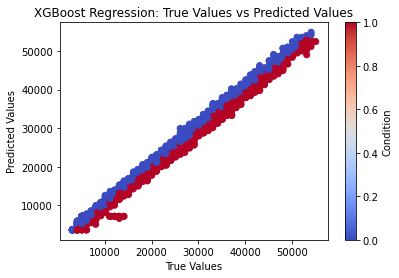

In [77]:
# Define a condition to apply colors
condition = y_test > y_test_pred_xgb
# Plot the predicted values against the true values
plt.scatter(y_test, y_test_pred_xgb, c=condition, cmap='coolwarm')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regression: True Values vs Predicted Values')
plt.colorbar(label='Condition')

# Comparing train and test MSE of 6 models

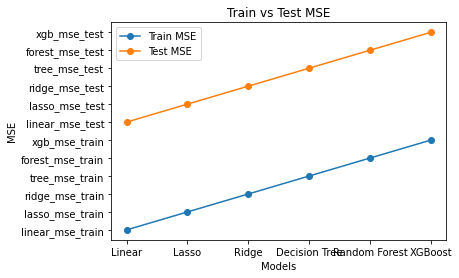

In [78]:
# List of model names
model_names = ['Linear','Lasso','Ridge','Decision Tree', 'Random Forest', 'XGBoost']

# Train MSE values for each model
train_mse = ['linear_mse_train' , 'lasso_mse_train' , 'ridge_mse_train', 'tree_mse_train' , 'forest_mse_train' ,'xgb_mse_train']

# Test RMSE values for each model
test_mse = ['linear_mse_test' , 'lasso_mse_test', 'ridge_mse_test', 'tree_mse_test', 'forest_mse_test', 'xgb_mse_test']

# Plotting the graph
plt.plot(model_names, train_mse, marker='o', label='Train MSE')
plt.plot(model_names, test_mse, marker='o', label='Test MSE')

# Set plot title and labels
plt.title('Train vs Test MSE')
plt.xlabel('Models')
plt.ylabel('MSE')
# Add legend
plt.legend()
# Display the plot
plt.show()

# Comparing train and test RMSE of 6 models

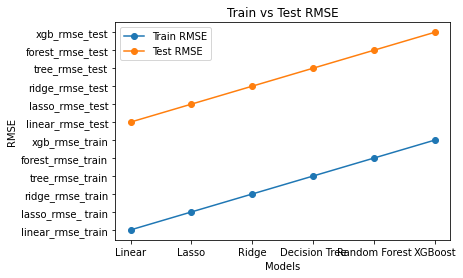

In [79]:
# List of model names
model_names = ['Linear','Lasso','Ridge','Decision Tree', 'Random Forest', 'XGBoost']

# Train RMSE values for each model
train_rmse = ['linear_rmse_train' , 'lasso_rmse_ train', 'ridge_rmse_train', 'tree_rmse_train', 'forest_rmse_train', 'xgb_rmse_train']

# Test RMSE values for each model
test_rmse = ['linear_rmse_test' , 'lasso_rmse_test', 'ridge_rmse_test', 'tree_rmse_test', 'forest_rmse_test', 'xgb_rmse_test']

# Plotting the graph
plt.plot(model_names, train_rmse, marker='o', label='Train RMSE')
plt.plot(model_names, test_rmse, marker='o', label='Test RMSE')

# Set plot title and labels
plt.title('Train vs Test RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
# Add legend
plt.legend()
# Display the plot
plt.show()

# Comparing train and test MAE of 6 models

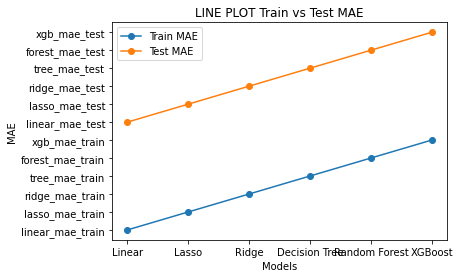

In [80]:
# List of model names
model_names = ['Linear','Lasso','Ridge','Decision Tree', 'Random Forest', 'XGBoost']

# Train MAE values for each model
train_mae = ['linear_mae_train' , 'lasso_mae_train', 'ridge_mae_train', 'tree_mae_train', 'forest_mae_train', 'xgb_mae_train']

# Test MAE values for each model
test_mae = ['linear_mae_test' , 'lasso_mae_test', 'ridge_mae_test', 'tree_mae_test','forest_mae_test', 'xgb_mae_test']

# Plotting the graph
plt.plot(model_names, train_mae, marker='o', label='Train MAE')
plt.plot(model_names, test_mae, marker='o', label='Test MAE')

# Set plot title and labels
plt.title('LINE PLOT Train vs Test MAE')
plt.xlabel('Models')
plt.ylabel('MAE')
# Add legend
plt.legend()
# Display the plot
plt.show()

# Comparing train and test R2 of 6 models

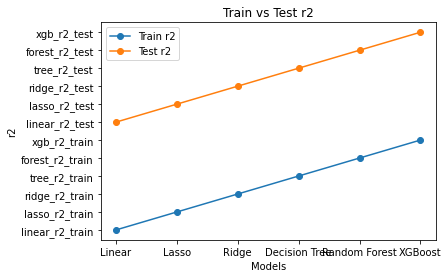

In [81]:
# List of model names
model_names = ['Linear','Lasso','Ridge','Decision Tree', 'Random Forest', 'XGBoost']

# Train MSE values for each model
train_r2 = ['linear_r2_train' , 'lasso_r2_train','ridge_r2_train', 'tree_r2_train', 'forest_r2_train', 'xgb_r2_train']

# Test RMSE values for each model
test_r2 = ['linear_r2_test' , 'lasso_r2_test', 'ridge_r2_test', 'tree_r2_test', 'forest_r2_test', 'xgb_r2_test']

# Plotting the graph
plt.plot(model_names,train_r2, marker='o', label='Train r2')
plt.plot(model_names,test_r2 , marker='o', label='Test r2')

# Set plot title and labels
plt.title('Train vs Test r2')
plt.xlabel('Models')
plt.ylabel('r2')
# Add legend
plt.legend()
# Display the plot
plt.show()

# Using test data to predict on top three models

In [82]:
test_data = pd.read_excel(r'C:\Users\Nandakishore\Desktop\Supply chain test dataset.xlsx')

In [83]:
test_data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,WH_122250,EID_72250,Rural,Large,North,Zone 6,7,0,2,5397,...,0,1,75,30.0,2019.0,9,1,A,1,29
1,WH_122251,EID_72251,Rural,Large,North,Zone 6,8,2,2,5183,...,0,0,138,20.0,2006.0,25,0,A,4,23
2,WH_122252,EID_72252,Rural,Large,North,Zone 6,3,0,4,4665,...,0,1,188,34.0,NaN,24,0,B,4,23
3,WH_122253,EID_72253,Rural,Mid,North,Zone 2,2,0,3,5196,...,0,1,156,31.0,NaN,15,0,A,4,1
4,WH_122254,EID_72254,Rural,Mid,North,Zone 2,5,2,4,8275,...,0,1,237,NaN,NaN,21,1,B+,2,12


In [84]:
test_data.shape

(2750, 23)

In [85]:
test_data.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      110
wh_est_year                     1288
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     101
wh_breakdown_l3m                   0
govt_check_l3m                     0
dtype: int64

In [86]:
test_data.wh_est_year.mean()

2009.2236662106702

In [87]:
test_data['workers_num'].median()

28.0

In [88]:
test_data['workers_num'].mean()

29.00719696969697

In [89]:
test_data['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [90]:
test_data['wh_est_year'] = test_data['wh_est_year'].fillna(2009)

In [91]:
test_data['workers_num'] = test_data['workers_num'].fillna(28)

In [92]:
test_data['approved_wh_govt_certificate'].fillna(test_data['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [93]:
test_data = test_data.drop(['Ware_house_ID','WH_Manager_ID','flood_proof'],axis=1)

In [94]:
test_data.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
dtype: int64

# Feature Engineering:

BINNING OF NEW COLUMNs

In [95]:
#Creating bins and labels 1:Warehouse Breakdown
bins = [0,2,4,6]
labels = ['less','medium','more']
test_data['breakdown range'] = pd.cut(test_data['wh_breakdown_l3m'],bins = bins, labels = labels)

In [96]:
#Creating bins and labels 2:Transport issues
bins = [-1,1,3,5]
labels = ['low','medium','high']
test_data['transport_issue_range'] = pd.cut(test_data['transport_issue_l1y'],bins = bins, labels = labels)

In [97]:
#Creating bins and labels 3:Storage Issues Reported
bins = [-1,10,20,30,40]
labels = ['low','medium','high','very high']
test_data['storage_issue_range'] = pd.cut(test_data['storage_issue_reported_l3m'],bins = bins, labels = labels)

In [98]:
#Creating bins and labels 4:Refill Request Range
bins = [-1,2,5,8]
labels = ['less','medium','more']
test_data['refill_req_range'] = pd.cut(test_data['num_refill_req_l3m'],bins = bins, labels = labels)

In [99]:
#Creating bins and labels 5:Warehouse Est Year
bins = [1995,2004,2013,2023]
labels = ['old_age','middle_age','new_age']
test_data['wh_est_year_range'] = pd.cut(test_data['wh_est_year'],bins = bins, labels = labels)

In [100]:
test_data = test_data.drop(['wh_breakdown_l3m','transport_issue_l1y','storage_issue_reported_l3m','num_refill_req_l3m','wh_est_year'],axis=1)

In [101]:
test_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,electric_supply,dist_from_hub,workers_num,temp_reg_mach,approved_wh_govt_certificate,govt_check_l3m,breakdown range,transport_issue_range,storage_issue_range,refill_req_range,wh_est_year_range
0,Rural,Large,North,Zone 6,2,5397,Company Owned,26,0,1,75,30.0,1,A,29,less,low,low,more,new_age
1,Rural,Large,North,Zone 6,2,5183,Rented,61,0,0,138,20.0,0,A,23,medium,medium,high,more,middle_age
2,Rural,Large,North,Zone 6,4,4665,Rented,26,0,1,188,34.0,0,B,23,medium,low,high,medium,middle_age
3,Rural,Mid,North,Zone 2,3,5196,Rented,36,0,1,156,31.0,0,A,1,medium,low,medium,less,middle_age
4,Rural,Mid,North,Zone 2,4,8275,Rented,58,0,1,237,28.0,1,B+,12,less,medium,high,medium,middle_age


In [102]:
test_data.shape

(2750, 20)

ENCODING CATEGORICAL VALUES INTO NUMERICAL

In [103]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_data['Location_type']= label_encoder.fit_transform(test_data['Location_type'])
test_data['WH_capacity_size']= label_encoder.fit_transform(test_data['WH_capacity_size'])
test_data['zone']= label_encoder.fit_transform(test_data['zone'])
test_data['WH_regional_zone']= label_encoder.fit_transform(test_data['WH_regional_zone'])
test_data['wh_owner_type']= label_encoder.fit_transform(test_data['wh_owner_type'])
test_data['approved_wh_govt_certificate']= label_encoder.fit_transform(test_data['approved_wh_govt_certificate'])

In [104]:
test_data['breakdown range']= label_encoder.fit_transform(test_data['breakdown range'])
test_data['transport_issue_range']= label_encoder.fit_transform(test_data['transport_issue_range'])
test_data['storage_issue_range']= label_encoder.fit_transform(test_data['storage_issue_range'])
test_data['refill_req_range']= label_encoder.fit_transform(test_data['refill_req_range'])
test_data['wh_est_year_range']= label_encoder.fit_transform(test_data['wh_est_year_range'])

In [105]:
test_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,electric_supply,dist_from_hub,workers_num,temp_reg_mach,approved_wh_govt_certificate,govt_check_l3m,breakdown range,transport_issue_range,storage_issue_range,refill_req_range,wh_est_year_range
0,0,0,1,5,2,5397,0,26,0,1,75,30.0,1,0,29,0,1,1,2,1
1,0,0,1,5,2,5183,1,61,0,0,138,20.0,0,0,23,1,2,0,2,0
2,0,0,1,5,4,4665,1,26,0,1,188,34.0,0,2,23,1,1,0,1,0
3,0,1,1,1,3,5196,1,36,0,1,156,31.0,0,0,1,1,1,2,0,0
4,0,1,1,1,4,8275,1,58,0,1,237,28.0,1,3,12,0,2,0,1,0


# Implimenting new columns:

Feature engineering 1 :Using logical operator OR.

Column name :Location OR Temperature Regulatory Machines.

In [106]:
test_data['location_with_temp_reg_machines'] = test_data['Location_type'] | test_data['temp_reg_mach'] 

Feature Engineering 2

Here combining storage issues and warehouse breakdown and creating a new column shows standard of WH.


In [107]:
test_data['storage_issue_breakdown'] = test_data['storage_issue_range'] + test_data['breakdown range']

In [108]:
test_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,electric_supply,...,temp_reg_mach,approved_wh_govt_certificate,govt_check_l3m,breakdown range,transport_issue_range,storage_issue_range,refill_req_range,wh_est_year_range,location_with_temp_reg_machines,storage_issue_breakdown
0,0,0,1,5,2,5397,0,26,0,1,...,1,0,29,0,1,1,2,1,1,1
1,0,0,1,5,2,5183,1,61,0,0,...,0,0,23,1,2,0,2,0,0,1
2,0,0,1,5,4,4665,1,26,0,1,...,0,2,23,1,1,0,1,0,0,1
3,0,1,1,1,3,5196,1,36,0,1,...,0,0,1,1,1,2,0,0,0,3
4,0,1,1,1,4,8275,1,58,0,1,...,1,3,12,0,2,0,1,0,1,0


In [109]:
test_data.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'electric_supply', 'dist_from_hub',
       'workers_num', 'temp_reg_mach', 'approved_wh_govt_certificate',
       'govt_check_l3m', 'breakdown range', 'transport_issue_range',
       'storage_issue_range', 'refill_req_range', 'wh_est_year_range',
       'location_with_temp_reg_machines', 'storage_issue_breakdown'],
      dtype='object')

So we performed BINNING with 5 columns wich are 'storage_issue_reported_l3m','wh_breakdown_l3m' ,'transport_issue_l1y',wh_est_year and num_refill_req_l3m.

Then we use OR operator to create column 'location_with_temp_reg_machines' and use '+' to create 'storage issue and breakdown'.

In [110]:
#Creating new dataset data2 as a copy of data1 and then dropping less significant columns.
test_data1=test_data.drop(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'electric_supply', 'dist_from_hub',
       'workers_num','govt_check_l3m', 'transport_issue_range','refill_req_range'],axis=1)
test_data1.head()

,temp_reg_mach,approved_wh_govt_certificate,breakdown range,storage_issue_range,wh_est_year_range,location_with_temp_reg_machines,storage_issue_breakdown
0,1,0,0,1,1,1,1
1,0,0,1,0,0,0,1
2,0,2,1,0,0,0,1
3,0,0,1,2,0,0,3
4,1,3,0,0,0,1,0


In [111]:
test_data1.shape

(2750, 7)

In [112]:
test_data1.columns

Index(['temp_reg_mach', 'approved_wh_govt_certificate', 'breakdown range',
       'storage_issue_range', 'wh_est_year_range',
       'location_with_temp_reg_machines', 'storage_issue_breakdown'],
      dtype='object')

In [113]:
#Applying minmamx scaler
test_data1[['temp_reg_mach', 'approved_wh_govt_certificate', 'breakdown range',
       'storage_issue_range', 'wh_est_year_range',
       'location_with_temp_reg_machines', 'storage_issue_breakdown']] = scaler.fit_transform(test_data1[['temp_reg_mach', 'approved_wh_govt_certificate', 'breakdown range',
       'storage_issue_range', 'wh_est_year_range',
       'location_with_temp_reg_machines', 'storage_issue_breakdown']])

In [115]:
# Predict on linear regressor
X_test = test_data1
linear_test_pred = linear_reg.predict(X_test)
linear_test_pred

array([ 1.05985798e+04,  8.42098348e+03,  8.52235848e+03, ...,
       -1.82211188e+15,  3.86727559e+04,  1.01106580e+04])

In [116]:
# Predict on decision tree
X_test = test_data1
dt_test_pred = tree_reg.predict(X_test)
dt_test_pred

array([10089.        ,  7535.28571429,  6975.94117647, ...,
       12110.5       , 42073.        ,  8616.08333333])

In [117]:
# Predict on random forest
X_test = test_data1
rf_test_pred = forest_reg.predict(X_test)
rf_test_pred

array([10240.34871429,  7563.35605744,  6992.4031499 , ...,
       12105.95911111, 41896.5862619 ,  8605.47435484])

In [118]:
# Predict on xgoost
X_test = test_data1
xgb_test_pred = xgb_reg.predict(X_test)
xgb_test_pred

array([10067.769 ,  7824.4746,  6681.821 , ..., 11287.048 , 41460.723 ,
        8653.207 ], dtype=float32)

In [119]:
# Adding three new columns to the test dataframe, one for each prediction made by the linear reressor,Random Forest  and Gradient XGBoosting .
test_data1['linear_prediction'] = linear_test_pred
test_data1['rf_prediction'] = rf_test_pred
test_data1['xgb_prediction'] = xgb_test_pred
test_data1['dt_prediction'] = dt_test_pred

In [121]:
test_data1.head(10)

,temp_reg_mach,approved_wh_govt_certificate,breakdown range,storage_issue_range,wh_est_year_range,location_with_temp_reg_machines,storage_issue_breakdown,linear_prediction,rf_prediction,xgb_prediction,dt_prediction
0,1.0,0.00,0.000000,0.333333,0.5,1.0,0.2,10598.579830,10240.348714,10067.768555,10089.000000
1,0.0,0.00,0.333333,0.000000,0.0,0.0,0.2,8420.983476,7563.356057,7824.474609,7535.285714
2,0.0,0.50,0.333333,0.000000,0.0,0.0,0.2,8522.358476,6992.403150,6681.820801,6975.941176
3,0.0,0.00,0.333333,0.666667,0.0,0.0,0.6,29175.739726,25861.447207,27351.384766,25864.923077
4,1.0,0.75,0.000000,0.000000,0.0,1.0,0.0,-284.032670,5088.247262,4894.844727,5130.500000
5,0.0,1.00,0.000000,0.333333,0.0,0.0,0.2,9504.095455,9488.815430,9557.055664,9491.761905
6,0.0,0.50,0.666667,0.000000,1.0,0.0,0.4,19333.874622,12101.475548,11481.495117,12106.666667
7,0.0,0.75,0.000000,0.666667,0.0,0.0,0.4,19830.786080,19838.437034,19789.517578,19849.833333
8,0.0,1.00,0.333333,0.666667,0.0,0.0,0.6,29378.489726,25798.440177,27224.416016,25819.428571
9,1.0,1.00,0.333333,0.000000,1.0,1.0,0.2,10578.329830,7583.136745,8152.631348,7595.357143
